# Introduction

This notebook presents examples based upon the Hands on Machine Learning textbook by Geron covering chapter for on linear model training.

* [Linear Regression](#linear-regression) 
* [Polynomial Regression](#Polynomial-Regression)
* [Performance Analysis Using Learning Curves](#Performance-Analysis-Using-Learning-Curves)
* [Regularization Techniques](#Regularization-Techniques)
* [Boston Housing Regression Examples](#Boston-Housing-Regression-Examples) 
* [Logistic Regression and Softmax](#Logistic-Regression-and-Softmax)

# Linear Regression

This section demonstrates multiple regression types including: **Closed-form solutions**, **Batch Gradient Descent**, **Stochastic Gradient Descent**, and **Mini-batch Gradient Descent**.

## Demonstration Setup

In [1]:
# Includes
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline 

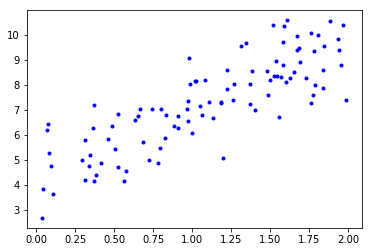

In [2]:
# Data Preparation
X = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X]
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

# Plot the data
plt.plot(X,y, "b.")

In [3]:
def showProgress(i, X, y, theta):
    """
    Helper function to show progress by (a) printing current theta and (b) plotting current
    regression
    """
    print("Theta (i=" + str(i+1) + "): " + str(theta))
    
    # Predict on x=0 and x=2
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)), X_new] # [[1,0][1,2]]
    y_predict = X_new_b.dot(theta)
    
    # Plot prediction
    plt.plot(X_new, y_predict)
    if (i==0): 
        plt.plot(X,y, "b.")

In [4]:
#####################################################################

## Linear Regression - Closed-Form Solution

This section shows the closed-form solution for linear regression.

Theta (i=1): [[4.36460507]
 [2.66179085]]
Predictions:
[[4.36460507]
 [5.69550049]
 [7.02639592]
 [8.35729134]
 [9.68818677]]


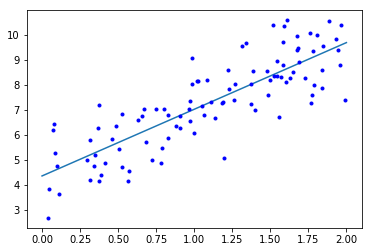

In [5]:
# Solve normal equation for theta
theta = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)

showProgress(0, X, y, theta)

# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)

print("Predictions:")
print(y_predict)

In [6]:
#####################################################################

## Linear Regression using Scikit-Learn

This shows how to use the built-in function within SKLearn to train a model.

Theta (i=1): [array([4.36460507]), array([[2.66179085]])]
Predictions:
[[4.36460507]
 [5.69550049]
 [7.02639592]
 [8.35729134]
 [9.68818677]]


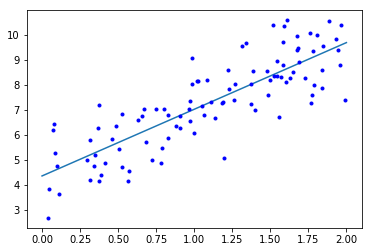

In [7]:
#  Create a linear regression and train it
lin_reg = LinearRegression()
lin_reg.fit(X,y)

theta = [lin_reg.intercept_, lin_reg.coef_]
showProgress(0, X, y, theta)

# Make a prediction using trained model
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = lin_reg.predict(X_new)

print("Predictions:")
print(y_predict)

In [8]:
#####################################################################

## Batch Linear Regression

This section presents the batch linear regression algorithm.

Theta (i=1): [[ 1.89275779]
 [-0.77088273]]
Theta (i=1): [[3.14164837]
 [0.81759685]]
Theta (i=2): [[3.79160401]
 [1.6479154 ]]
Theta (i=3): [[4.1290598 ]
 [2.08256113]]
Theta (i=4): [[4.30348683]
 [2.31069464]]
Theta (i=5): [[4.39288342]
 [2.43102779]]
Theta (i=6): [[4.43795078]
 [2.49507298]]
Theta (i=7): [[4.45992717]
 [2.52971212]]
Theta (i=8): [[4.4698944 ]
 [2.54897408]]
Theta (i=9): [[4.4736343 ]
 [2.56018045]]
Theta (i=10): [[4.474163  ]
 [2.56715274]]
Theta (i=11): [[4.4730534 ]
 [2.57188596]]
Theta (i=12): [[4.47112534]
 [2.57542193]]
Theta (i=13): [[4.46880567]
 [2.5783051 ]]
Theta (i=14): [[4.46631619]
 [2.58082031]]


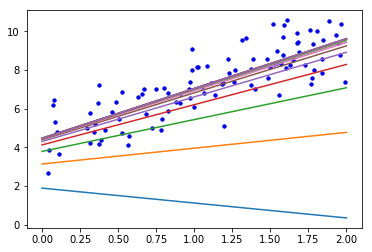

In [9]:
# Set algorithm parameters
eta = 0.1 
n_iterations = 10000
m = (len(X)) # number of inputs
epsilon = 0.00001

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

# Train Linear Model
for i in range(0,n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # 2/m * XT.(X.theta - y)

    if np.mean(-gradients) < epsilon:
        break
    
    theta = theta - eta * gradients
    
    showProgress(i, X, y, theta)

In [10]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new] 

y_predict = X_new_b.dot(theta)
print(y_predict)

[[4.46631619]
 [5.75672634]
 [7.04713649]
 [8.33754665]
 [9.6279568 ]]


In [11]:
#####################################################################

## Stochastic Gradient Descent

This section implements a stochastic gradient descent.

In [12]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[-0.56837782]
 [-0.5969637 ]]
Theta (i=1): [[4.00495692]
 [2.84219505]]
Theta (i=2): [[4.30287387]
 [2.83054695]]
Theta (i=3): [[4.1920497 ]
 [2.70961239]]
Theta (i=4): [[4.32831682]
 [2.72802065]]
Theta (i=5): [[4.39210324]
 [2.66544778]]
Theta (i=6): [[4.4429436 ]
 [2.73130233]]
Theta (i=7): [[4.39571383]
 [2.71510688]]
Theta (i=8): [[4.33134977]
 [2.63967254]]
Theta (i=9): [[4.31996488]
 [2.63465047]]
Theta (i=10): [[4.41372827]
 [2.80175949]]
Theta (i=11): [[4.36933368]
 [2.71748225]]
Theta (i=12): [[4.3605807 ]
 [2.65382238]]
Theta (i=13): [[4.31843842]
 [2.61134315]]
Theta (i=14): [[4.3224333]
 [2.6350559]]
Theta (i=15): [[4.36644868]
 [2.71882273]]
Theta (i=16): [[4.34303266]
 [2.64883644]]
Theta (i=17): [[4.32679019]
 [2.62950778]]
Theta (i=18): [[4.38177328]
 [2.63558553]]
Theta (i=19): [[4.345724  ]
 [2.58864658]]
Theta (i=20): [[4.38462573]
 [2.66626825]]
Theta (i=21): [[4.39539007]
 [2.65417138]]
Theta (i=22): [[4.38346948]
 [2.65264996]]
Theta (i=23): [[4.348

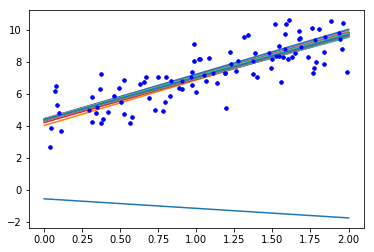

In [13]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 2 * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [14]:
# Predictions based upon theta
# Data
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]

# Prediction
y_predict = X_new_b.dot(theta)
print(y_predict)

[[4.3781073 ]
 [5.70307561]
 [7.02804391]
 [8.35301222]
 [9.67798052]]


In [15]:
#####################################################################

## Mini-Batch Gradient Descent

Demonstrates an implementation of the mini-batch gradient descent.

In [16]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[0.69522514]
 [0.13198678]]
Theta (i=1): [[4.10463583]
 [2.91734581]]
Theta (i=2): [[4.20077007]
 [2.74916627]]
Theta (i=3): [[4.32899395]
 [2.76866348]]
Theta (i=4): [[4.30141887]
 [2.69883061]]
Theta (i=5): [[4.32124905]
 [2.70577193]]
Theta (i=6): [[4.3379417 ]
 [2.73062156]]
Theta (i=7): [[4.31321255]
 [2.70167937]]
Theta (i=8): [[4.31842761]
 [2.72059641]]
Theta (i=9): [[4.28873736]
 [2.65338549]]
Theta (i=10): [[4.3018859 ]
 [2.63978711]]
Theta (i=11): [[4.32537647]
 [2.64257367]]
Theta (i=12): [[4.33421985]
 [2.66134323]]
Theta (i=13): [[4.35362538]
 [2.64151005]]
Theta (i=14): [[4.39011399]
 [2.67158668]]
Theta (i=15): [[4.37728366]
 [2.66162364]]
Theta (i=16): [[4.34829299]
 [2.6329208 ]]
Theta (i=17): [[4.3794308 ]
 [2.66733373]]
Theta (i=18): [[4.36912975]
 [2.67433231]]
Theta (i=19): [[4.36729218]
 [2.64636725]]
Theta (i=20): [[4.39170573]
 [2.68443225]]
Theta (i=21): [[4.38224317]
 [2.66543571]]
Theta (i=22): [[4.37586763]
 [2.67176286]]
Theta (i=23): [[4.353

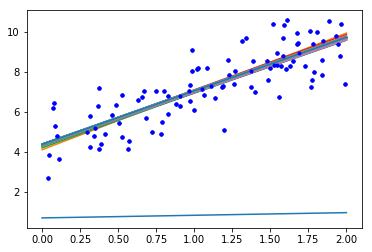

In [17]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

batch_size = 5 # b


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.arange(m) #array from 0 to m-1
        np.random.shuffle(rand_idx) #shuffle index arry

        xi = X_b[rand_idx[:batch_size]] #grab labels for first b rows
        yi = y[rand_idx[:batch_size]]   #grab labels for first b rows
        
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)  # 2/b * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [18]:
# Predictions based upon theta

# Data
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]

# Prediction
y_predict = X_new_b.dot(theta)
print(y_predict)

[[4.37336318]
 [5.71101338]
 [7.04866358]
 [8.38631378]
 [9.72396398]]


In [19]:
#####################################################################
#####################################################################

# Polynomial Regression

Implements polynomial regression using the PolynomialFeatures function of sklearn.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

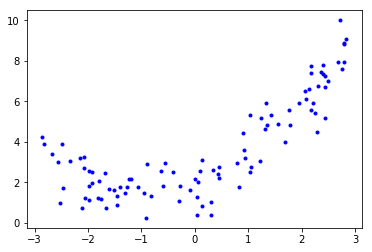

In [21]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

The following demonstrates the polynomial regression.  By changing the variable *degree* you can observe the change in the plot of the model.

Trained Theta:
[1.69414711] [[-1.70028900e-01  1.65919597e+00  1.58224833e+00 -8.39245741e-01
  -6.22511692e-01  2.46098767e-01  9.34195159e-02 -3.27005664e-02
  -4.78110133e-03  1.62003668e-03]]


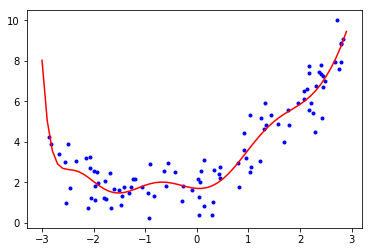

In [22]:
# Adjust degree to observe change in model
degree = 10

# Add extra features using PolynomialFeatures transform
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Train the modified input data set.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("Trained Theta:")
print(lin_reg.intercept_, lin_reg.coef_)


# Prepare test data
x_test = [[0.1*x] for x in range(-30,30)]
test_X_poly = poly_features.fit_transform(x_test)

# Predict using test data
predict = lin_reg.predict(test_X_poly)

# Plot Scatter and Model
plt.plot(X,y,"b.")
plt.plot(x_test, predict,"r-")

# Performance Analysis Using Learning Curves

Demonstrated using Polynomial Regression examples.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [24]:
def plot_learning_curves(model, X, y):
    """
    Plots performance on the training set and testing (validation) set.
    X-axis - number of training samples used
    Y-axis - RMSE
    """
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20)
    
    training_errors, validation_errors = [], []
    
    for m in range(1, len(train_X)):
        
        model.fit(train_X[:m], train_y[:m])
        
        train_pred = model.predict(train_X)
        test_pred = model.predict(test_X)
        
        training_errors.append(np.sqrt(mean_squared_error(train_y, train_pred)))
        validation_errors.append(np.sqrt(mean_squared_error(test_y, test_pred)))
        
    plt.plot(training_errors, "r-+", label="train")
    plt.plot(validation_errors, "b-", label="test")
    plt.legend()
    plt.axis([0, 80, 0, 3])     

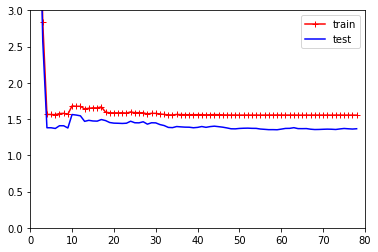

In [25]:
# Demonstrate our plot
plot_learning_curves(LinearRegression(), X, y)

Now, we can observe the performance of a polynomial regression algorithm.

Here, we use the Pipeline to first add the polynomial features and then perform a linear regression.  We can call this as a model in sklearn.

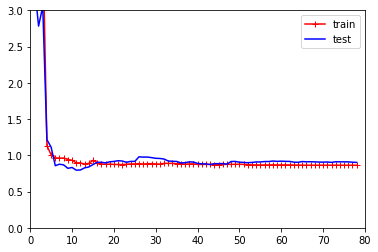

In [26]:
degree = 2

model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(model, X, y)

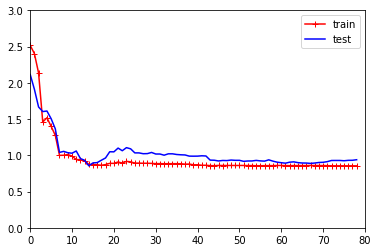

In [27]:
degree = 3

poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_reg, X, y)

In [28]:
#####################################################################
#####################################################################

# Regularization Techniques

Regularizaton helps reduce the overfitting for regression algorithms.  Here, we are demonstrating three variations of the regression algorithms previously covered called **Ridge**, **Lasso**, and **Elastic Net** Regression.

## Ridge Regression

In [29]:
# New Includes
from sklearn.linear_model import Ridge, SGDRegressor

### Demonstration Data Set and Test Inputs

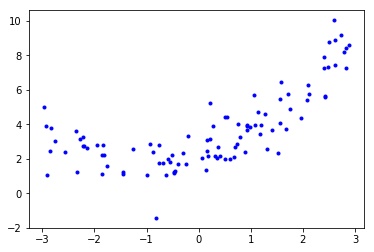

In [30]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

Closed-Form Approach using Ridge class w/ Cholesky solver (formulation of closed form solution for regression with ridge regularization)

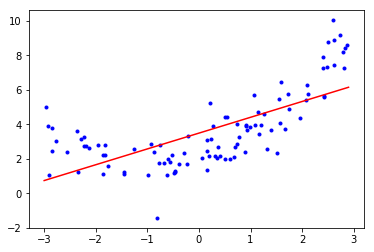

In [31]:
alpha = 0.8

# Build and Train
model = Ridge(alpha=alpha, solver="cholesky")
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Observe how our model changes as we adjust our alpha from 1 to 1000

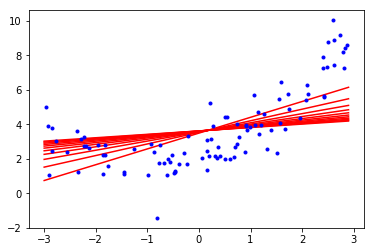

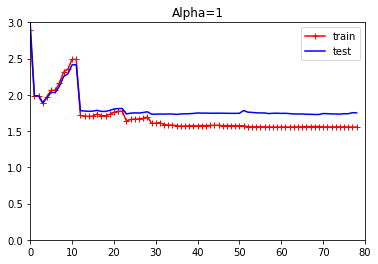

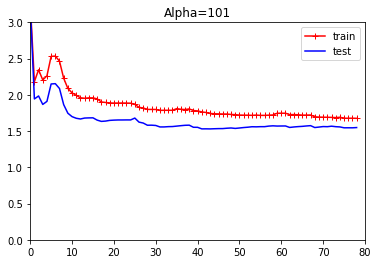

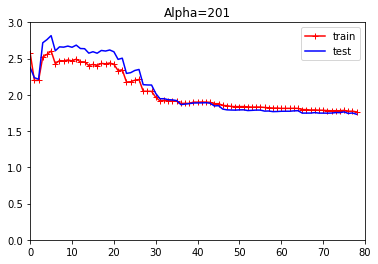

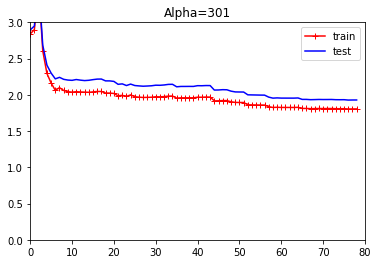

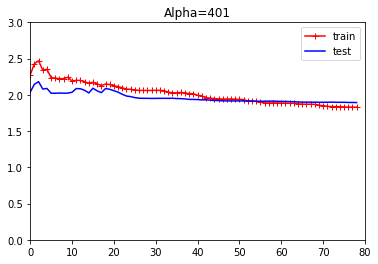

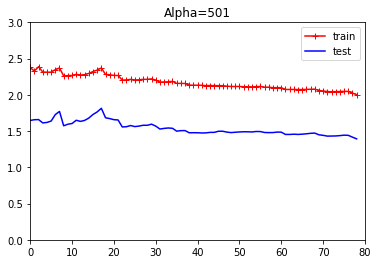

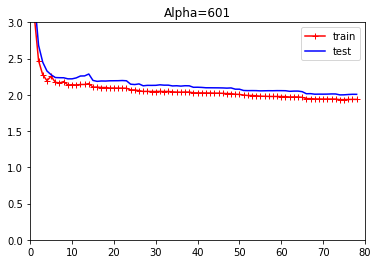

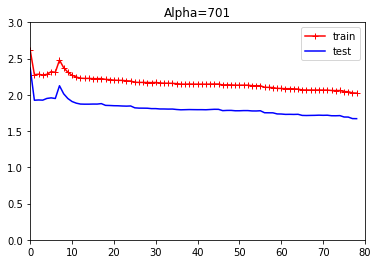

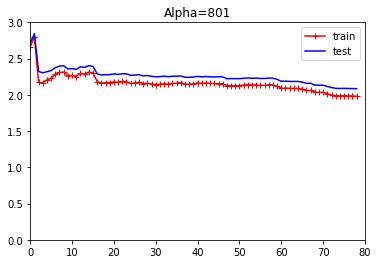

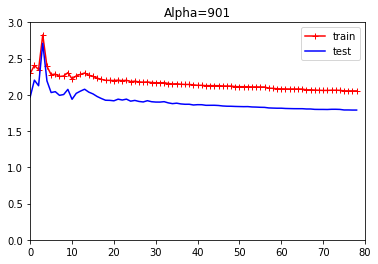

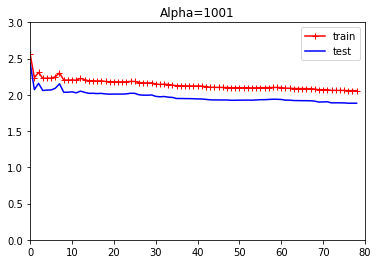

In [32]:
for a in range(0,1001,100):
    
    alpha = (a+1)
    
    model = Ridge(alpha=alpha, solver="cholesky")
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(alpha))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

The following snippet shows the impact of Ridge regularization on polynomial regression.

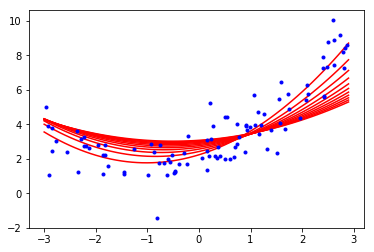

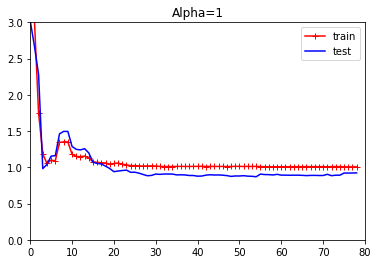

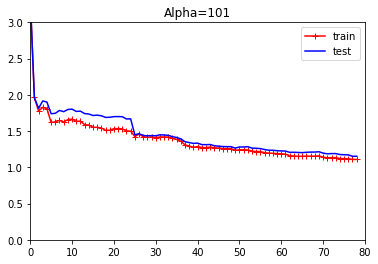

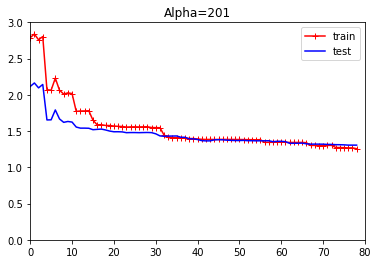

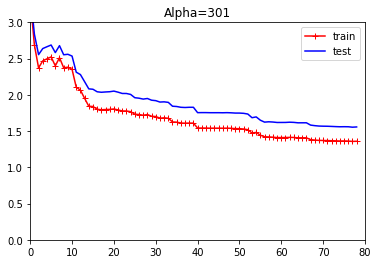

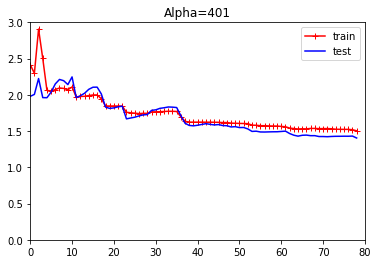

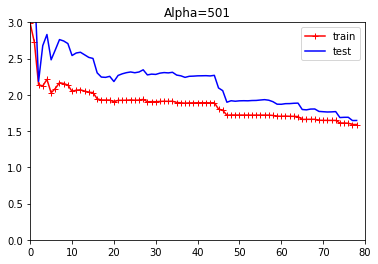

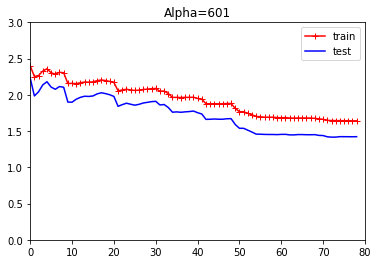

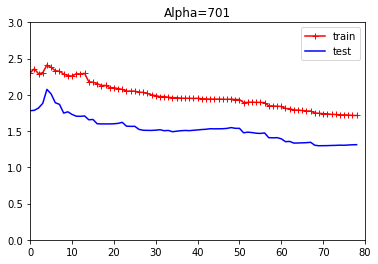

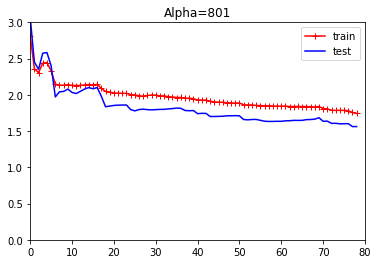

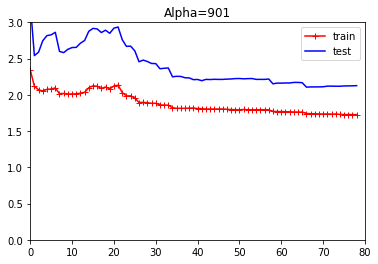

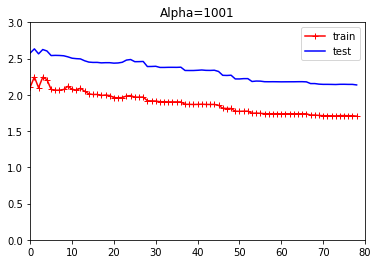

In [33]:
deg = 2
for a in range(0,1001,100):
    
    alpha = a+1
    
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
        ("Ridged", Ridge(alpha=alpha, solver="cholesky")),
        ])
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(alpha))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

### Stochastic Gradient Descent w/ Ridge Regression Enabled as L2 penalty

Using the stochastic gradient descent class in scikit-learn, we can apply the l2 penalty to achieve a Ridge Stochastic Regression.

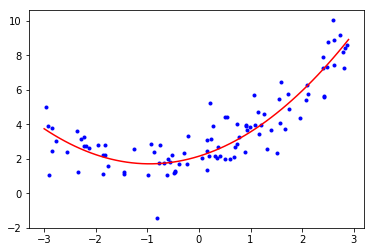

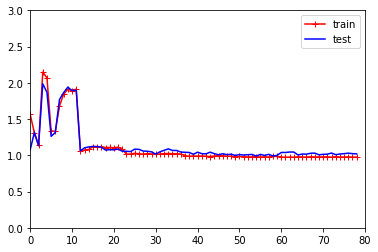

In [34]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD Ridge", SGDRegressor(penalty="l2", max_iter=100000, tol=0.00001)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

In [35]:
#####################################################################

## Lasso Regularization

Lasso regularization can be used to implement lasso regression using the l1 penalty as the term for the regularization factor.

In [36]:
# Includes
from sklearn.linear_model import Lasso

### Demonstration Data Set and Test Inputs

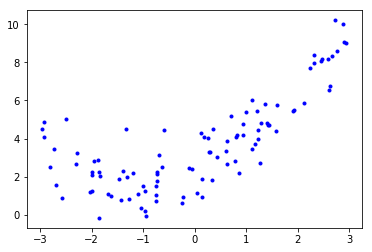

In [37]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

### Lasso Regression - Linear Example

This demonstrates the Linear Regression with Lasso Model using the Lasso class built into SkLearn

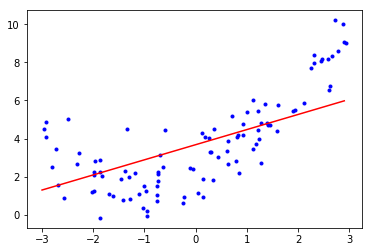

In [38]:
alpha = 0.8

# Build and Train
model = Lasso(alpha=alpha)
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

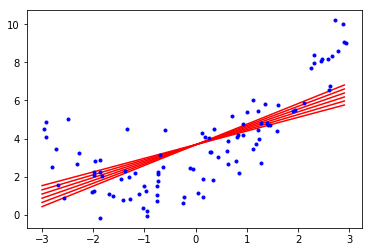

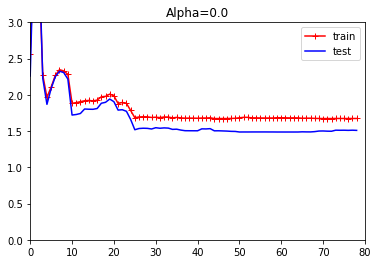

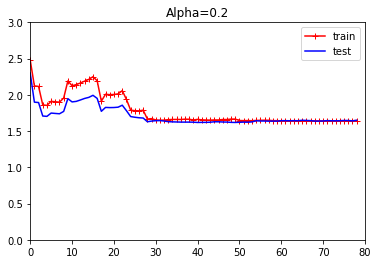

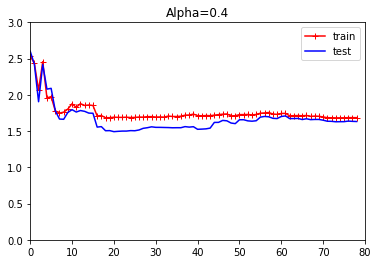

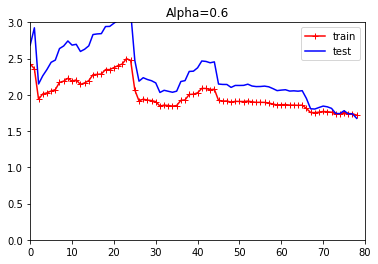

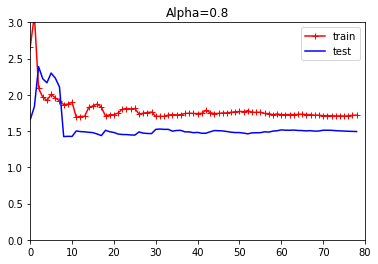

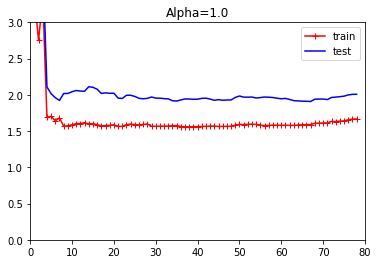

In [39]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Lasso(alpha=alpha)
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

### Lasso Regression - Polynomial Example

Now, we will change our model to a polynomial of a specified degreee.  We can then observe how our model is impacted as alpha is adjusted.

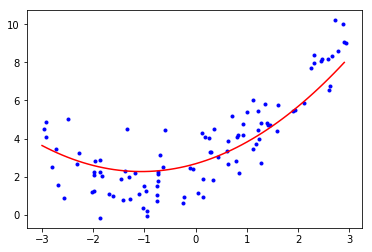

In [40]:
alpha = 0.8
deg = 2

# Build and Train
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Lasso", Lasso(alpha=alpha)),
    ])
    
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

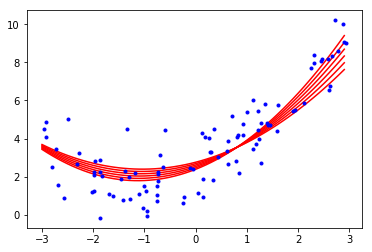

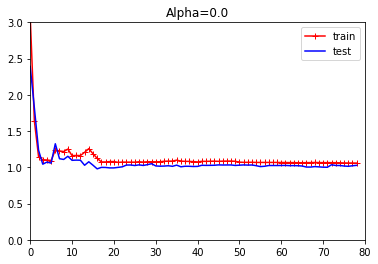

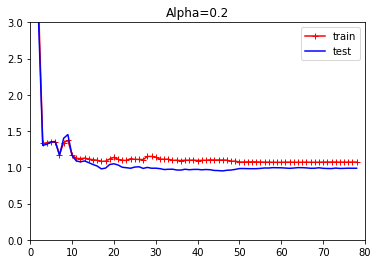

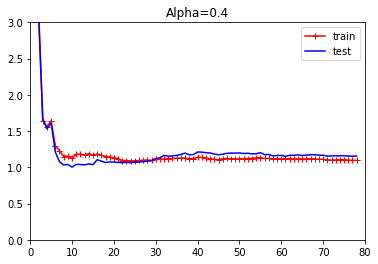

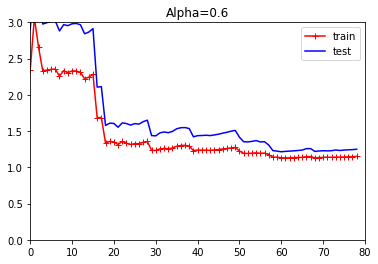

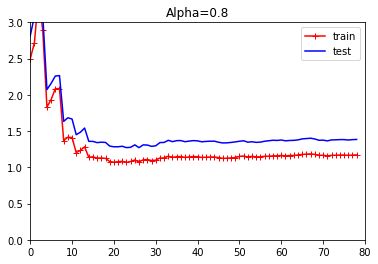

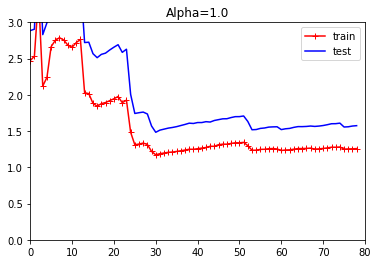

In [41]:
deg = 2
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Lasso", Lasso(alpha=alpha)),
    ])
    
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())
    
plt.figure(0)
plt.plot(X,y,"b.")

### Lasso Regression - Stochastic Gradient Descent Example

Now, we will utilize steepest gradient descent with an l1 penalty to implement our lasso regression.  For our example, we will use a polynomial model.

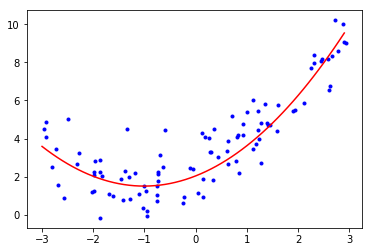

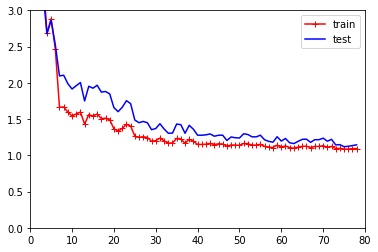

In [42]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD Lasso", SGDRegressor(penalty="l1", max_iter=1000, tol=0.01)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

In [43]:
#####################################################################

## Elastic Net Regularization

Elastic Net blends Ridge and Lasso regularization techniques.

In [44]:
# Includes
from sklearn.linear_model import ElasticNet

### Demonstration Data Set and Test Inputs

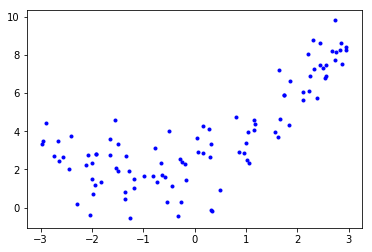

In [45]:
# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

# Test data - values between -3 to 3 in 0.1 increments
x_test = [[0.1*x] for x in range(-30,30)]

### Elastic Net Regression - Linear Example

This demonstrates the Linear Regression with Lasso Model using the Lasso class built into SkLearn

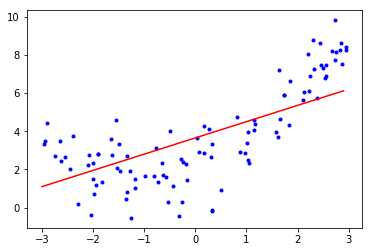

In [46]:
alpha = 0.8

# Build and Train
model = ElasticNet(alpha=alpha)
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

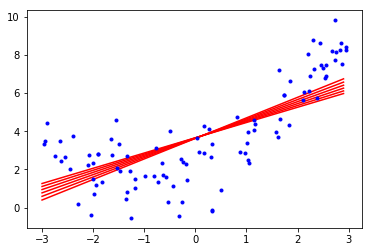

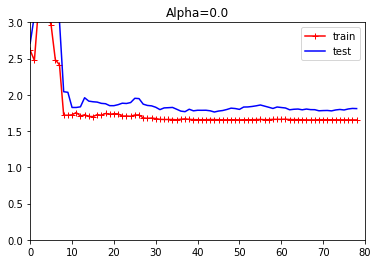

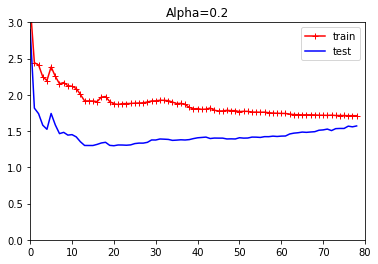

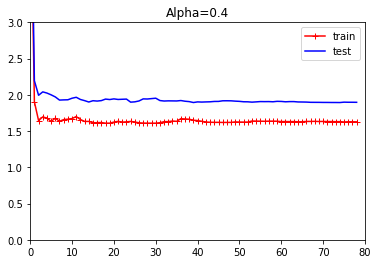

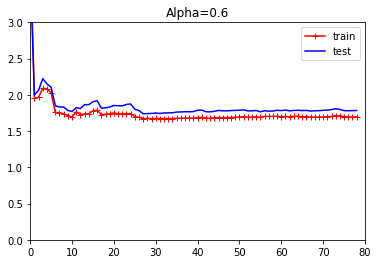

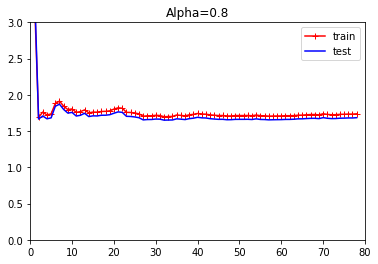

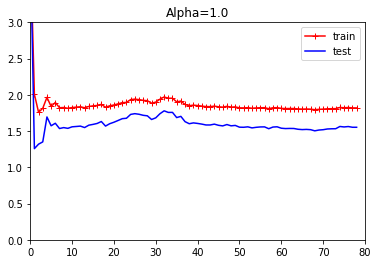

In [47]:
for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = ElasticNet(alpha=alpha)
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())

plt.figure(0)
plt.plot(X,y,"b.")

# Note on Syntax
# Figure 0 - plots curves for each model
# Figure (a+1) - plots the figure for each alpha=(a+1)*0.1
#  By specifying the figure before each plot, we tell matplot
#  lib which plot to update.

### Elastic Net Regression - Polynomial Example

Now, we will change our model to a polynomial of a specified degreee.  We can then observe how our model is impacted as alpha is adjusted.

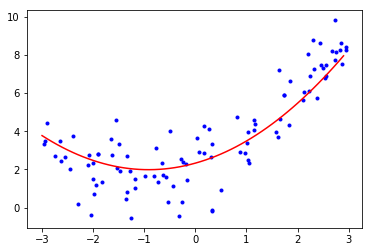

In [48]:
alpha = 0.8
deg = 2

# Build and Train
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Elastic", ElasticNet(alpha=alpha)),
    ])
    
model.fit(X,y)

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(X,y,"b.")          
plt.plot(x_test, predict,"r-")

Let's observe our models and their learning curves across alphas from 0 to 1.

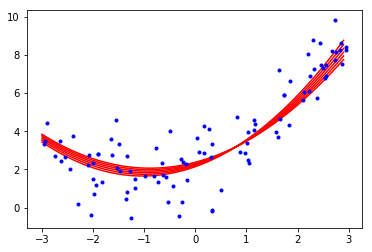

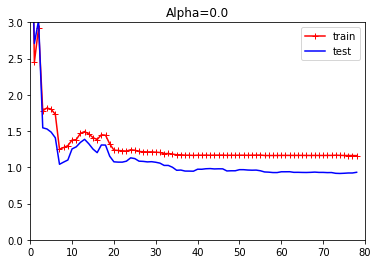

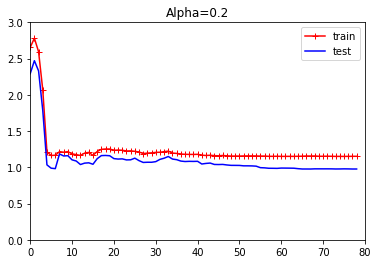

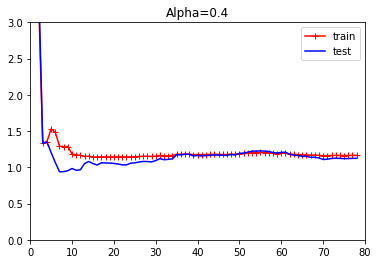

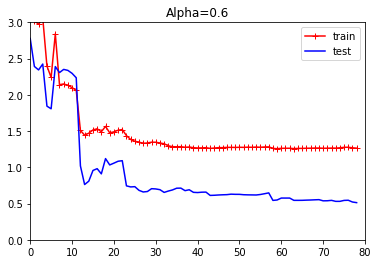

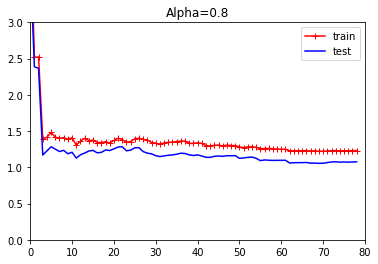

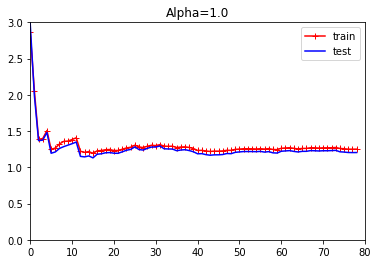

In [49]:
deg = 2

for a in range(0,101,20):
    
    alpha = 0.01*(a+1)
    
    model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Elastic", ElasticNet(alpha=alpha)),
    ])
    
    model.fit(X,y.ravel())
    
    plt.figure(0)
    
    # Plot polynomials for each alpha
    predict = model.predict(x_test)
    plt.plot(x_test, predict,"r-")
    
    plt.figure(a+1)
   
    # Plot learning curve for each alpha
    plt.title("Alpha=" + str(a*0.01))
    plot_learning_curves(model, X, y.ravel())
    
plt.figure(0)
plt.plot(X,y,"b.")

### Elastic Net Regression - Stochastic Gradient Descent Example

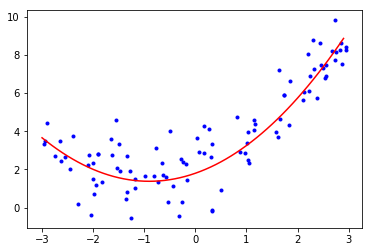

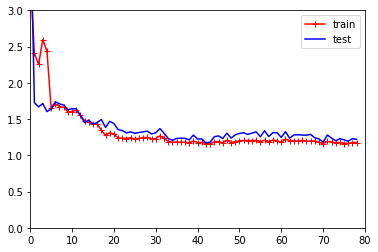

In [50]:
deg = 2

plt.figure(0)
plt.plot(X,y,"b.")
    
# Build Polynomial SGD w/ Lasso Regularization
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("SGD ElasticNet", SGDRegressor(penalty="elasticnet", max_iter=1000, tol=0.01)),
    ])
    
model.fit(X,y.ravel())

# Plot polynomials for each alpha
predict = model.predict(x_test)
plt.plot(x_test, predict,"r-")
    
plt.figure(1)
   
plot_learning_curves(model, X, y.ravel())

In [51]:
#####################################################################
#####################################################################

## Boston Housing Regression Examples

Dataset User Guide: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
Dataset API Info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston


   * CRIM per capita crime rate by town
   * ZN proportion of residential land zoned for lots over 25,000 sq.ft.
   * INDUS proportion of non-retail business acres per town
   * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * NOX nitric oxides concentration (parts per 10 million)
   * RM average number of rooms per dwelling
   * AGE proportion of owner-occupied units built prior to 1940
   * DIS weighted distances to five Boston employment centres
   * RAD index of accessibility to radial highways
   * TAX full-value property-tax rate per \$10,000
   * PTRATIO pupil-teacher ratio by town
   * B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   * LSTAT % lower status of the population
   * MEDV Median value of owner-occupied homes in \$1000’s


In [52]:
# New Includes
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002381063DCC0>,
      dtype=object)

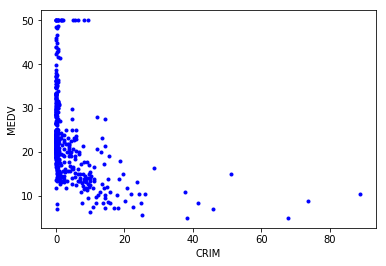

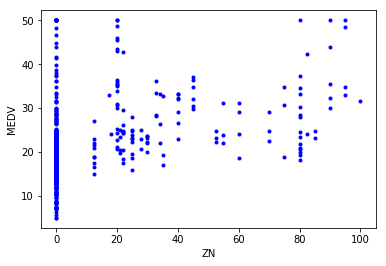

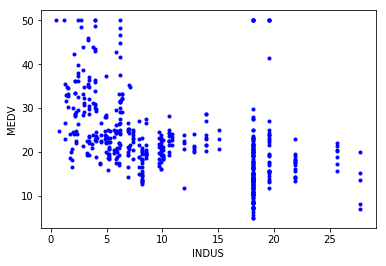

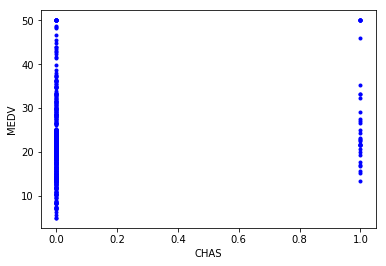

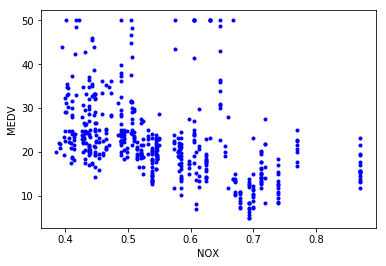

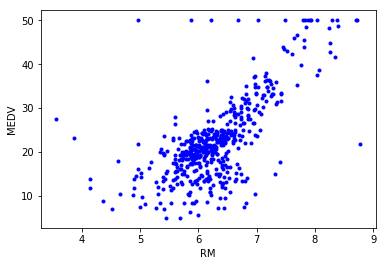

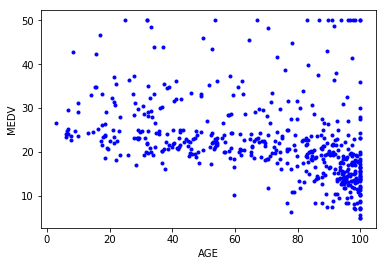

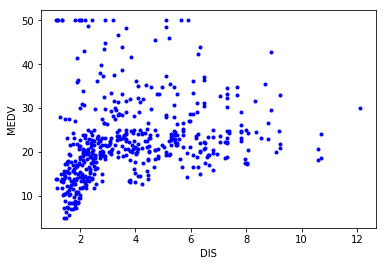

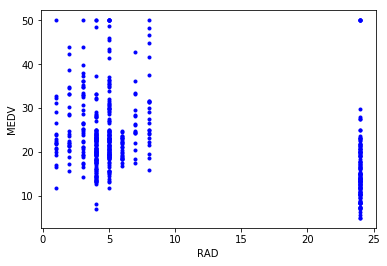

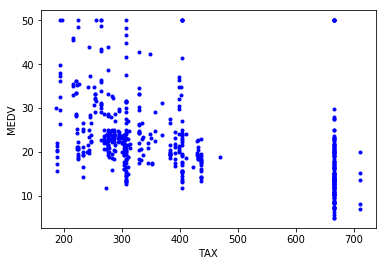

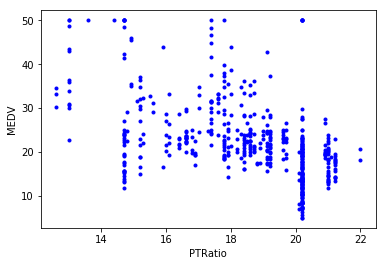

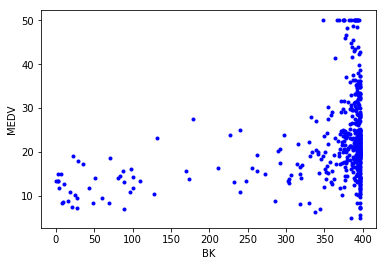

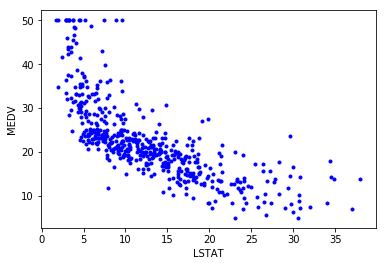

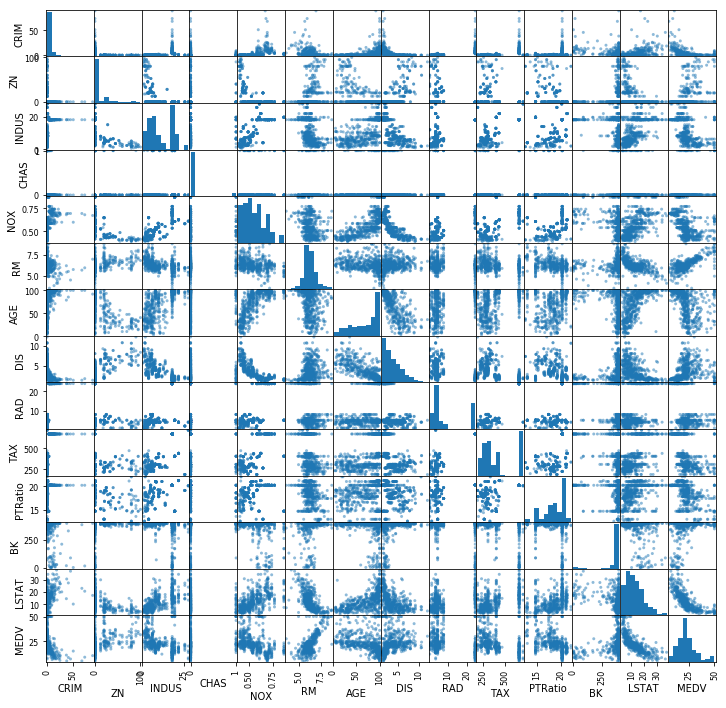

In [53]:
# Load Data Set
boston_housing_data = datasets.load_boston()

# Build data frame for visualization
boston_df = pd.DataFrame(np.c_[boston_housing_data.data, boston_housing_data.target], 
                  columns=["CRIM", "ZN","INDUS","CHAS", "NOX","RM","AGE",
                           "DIS","RAD","TAX","PTRatio","BK", "LSTAT","MEDV"])

# Plot relationship between each attribute and MEDV
for column in boston_df.columns:
    
    if column == "MEDV": continue
    
    plt.figure(column)
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.plot(boston_df[column], boston_df["MEDV"], "b.")

scatter_matrix(boston_df, figsize=(12, 12))

In [54]:
# Data Preparation
scaler = StandardScaler()
boston_data_set = scaler.fit_transform(boston_housing_data.data)
train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

Now, let's see how well we can model the boston housing data using a linear regressino function built into sklearn.

Theta:
22.412172894482335 [-1.25702737  1.42566326  0.24566916  0.87042922 -2.39144754  2.55764623
 -0.08563888 -3.85491551  2.77489945 -2.17253689 -1.87030089  1.09909576
 -4.02201578]
MAE = 3.37639720988803


[0, 300, 0, 10]

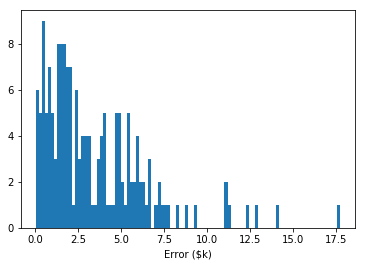

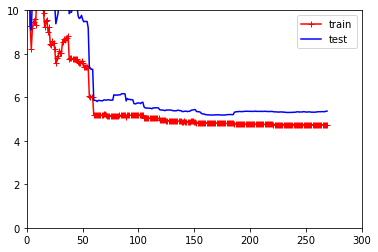

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

Next, we can observe the performance of a stochastic gradient regressor model **without any regularization.**

Theta:
[22.4049864] [-1.14755532  1.11342342 -0.04481573  0.90739232 -2.13360263  2.7271372
 -0.15303319 -3.57150728  1.83087226 -1.12516993 -1.8220424   1.07999531
 -3.89232512]
MAE = 3.2839251686688486


C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1219: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1219: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1219: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[0, 300, 0, 10]

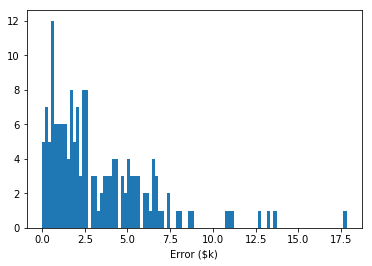

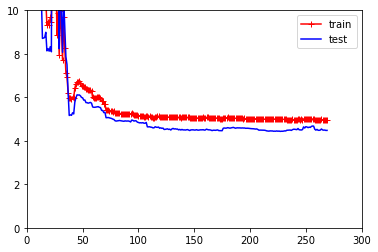

In [56]:
lin_reg = SGDRegressor(penalty="none", max_iter=10000, tol=0.0001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

Next, we can observe the performance of a gradient regressor model **with ridge regularization.**

Theta:
22.367674259442847 [-0.8303981   0.47951419 -0.38043422  0.8445541  -0.88434384  2.65078263
 -0.18094139 -1.57821389  0.5189475  -0.57260447 -1.53555078  0.89372858
 -2.89361609]
MAE = 3.06819188189873


[0, 300, 0, 10]

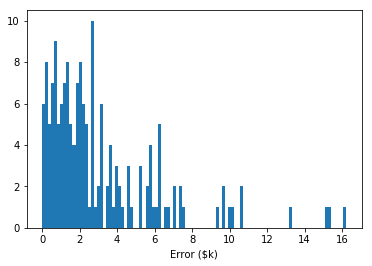

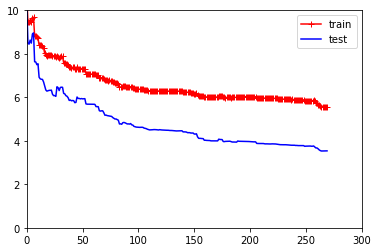

In [57]:
lin_reg = Ridge(alpha=100)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

Next, we can observe the performance of a gradient regressor model **with lasso regularization.**

Theta:
22.396361124208564 [-0.67058975  0.46883568 -0.          0.80121323 -1.47048581  2.85037086
 -0.         -2.33137917  0.10491098 -0.         -1.68896312  0.86548282
 -3.95016643]
MAE = 3.118704037364304


[0, 300, 0, 10]

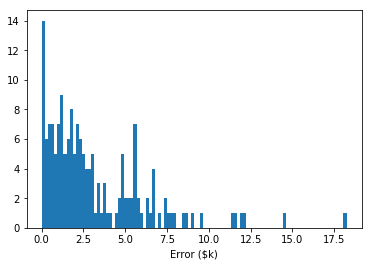

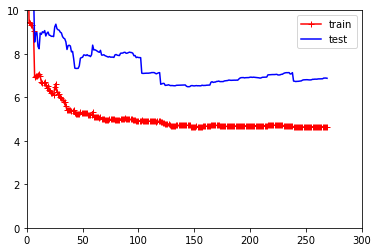

In [58]:
lin_reg = Lasso(alpha=0.2)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

Finally, let's observe performance with the elasticnet regression algorithm.

Theta:
22.370696280889955 [-0.60150659  0.15038432 -0.20886769  0.70079025 -0.61800406  2.67302621
 -0.         -0.90098814  0.         -0.25408199 -1.48427386  0.73150436
 -2.98189202]
MAE = 3.1319763331533825


[0, 300, 0, 10]

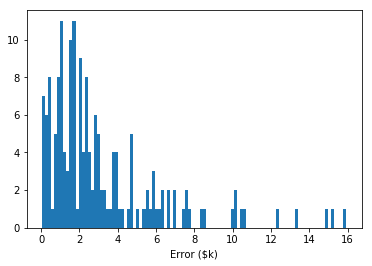

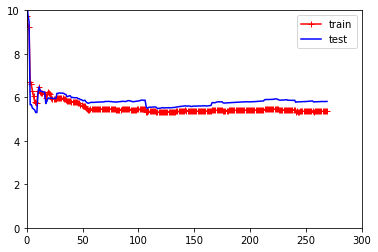

In [59]:
lin_reg = ElasticNet(alpha=0.5)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

Let's examine how the algorithm performs if we reduce the number of features based upon some of intiutions from viewing the data earlier.

In [60]:
# Prepare the new data set

attributes = ["AGE","RM","LSTAT"]

boston_data_set = boston_df[attributes]
boston_data_set = scaler.fit_transform(boston_housing_data.data)
train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

Theta:
22.545515045223308 [-0.88177554  1.02173437  0.21987982  0.46516374 -1.72675319  3.05300972
 -0.30755348 -3.34475526  2.76706886 -2.46985164 -2.05391823  1.22388205
 -3.50947615]
MAE = 2.9342134752405182


[0, 300, 0, 10]

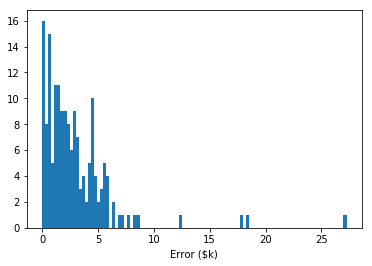

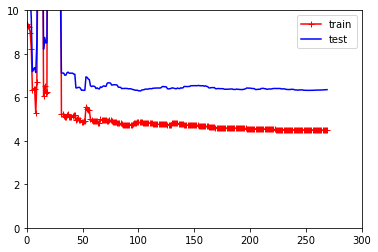

In [61]:
# Linear Regression Demo

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

Theta:
[22.54009708] [-0.76782506  0.90182944 -0.11661961  0.51502716 -1.58455801  3.10412429
 -0.34738964 -3.26321836  1.93748356 -1.6259299  -1.99623422  1.23234876
 -3.4839008 ]
MAE = 2.890086415791011


[0, 300, 0, 10]

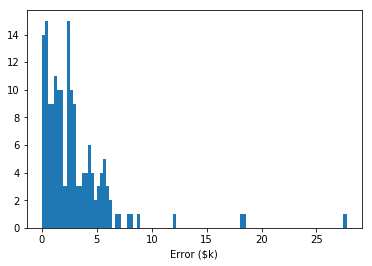

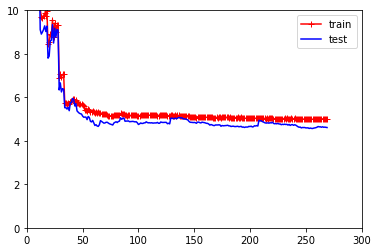

In [62]:
lin_reg = SGDRegressor(penalty="none", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print("Theta:")
print(lin_reg.intercept_, lin_reg.coef_)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

MAE = 2.5754917716574752


[0, 300, 0, 10]

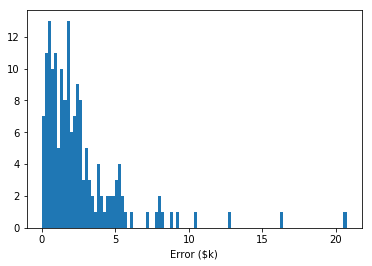

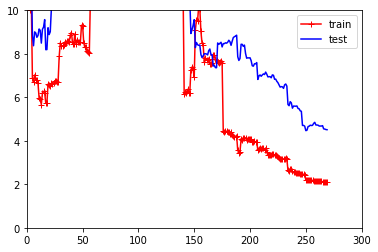

In [63]:
deg = 2

lin_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

MAE = 2.039410991305801


[0, 300, 0, 10]

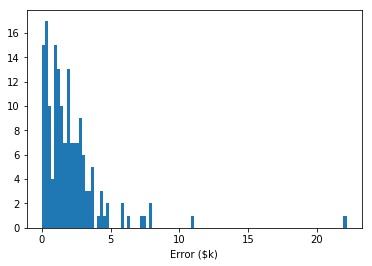

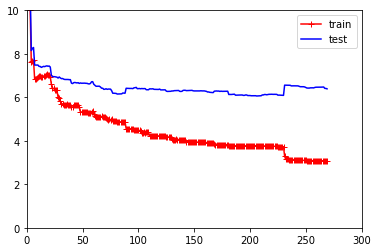

In [64]:
deg = 2

lin_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("lin_reg", Ridge(alpha=100)),
    ])

lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])


MAE = 2.3158325484525855


C:\Users\richard.stansbury\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[0, 300, 0, 10]

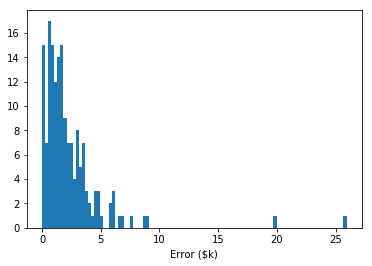

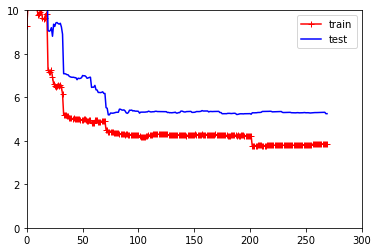

In [65]:
deg = 2

lin_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("lin_reg", Lasso(alpha=0.5)),
    ])

lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

print("MAE = " + str(mean_absolute_error(test_y, pred_y)))

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

2.2966719010788625

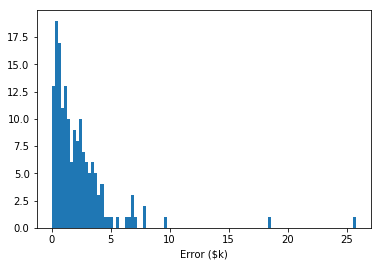

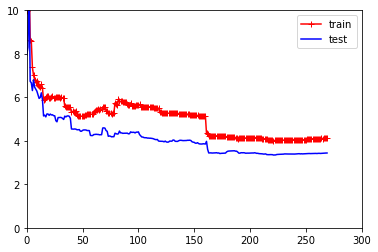

In [66]:
deg = 2

lin_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("lin_reg", ElasticNet(alpha=0.5)),
    ])

lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

plt.figure("a")
plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

plt.figure("b")
plot_learning_curves(lin_reg, train_X, train_y)
plt.axis([0,300,0,10])

mean_absolute_error(test_y, pred_y)

In [67]:
#####################################################################
#####################################################################

# Logistic Regression and Softmax

Logistic regression and softmax handle binary classification and multi-class classification, respectively.

In [68]:
from sklearn.linear_model import LogisticRegression

Observe the following plot of the logistic function.  As its input moves away from 0.5 it quickly outputs 1 or 0.

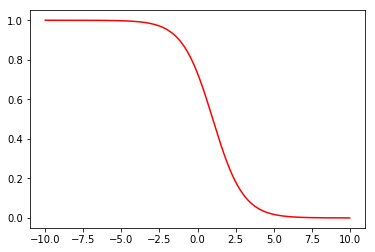

In [69]:
# Plot Logistic Function

t = np.array([0.01*x for x in range(-1000,1000)])
logit = 1 / (1 + np.exp(t-1))
plt.plot(t,logit,'r-')


We shall use the Iris data set to demonstrate the logistic and softmax regression algorithms.

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      Target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002381DE5DE80>,
      dtype=object)

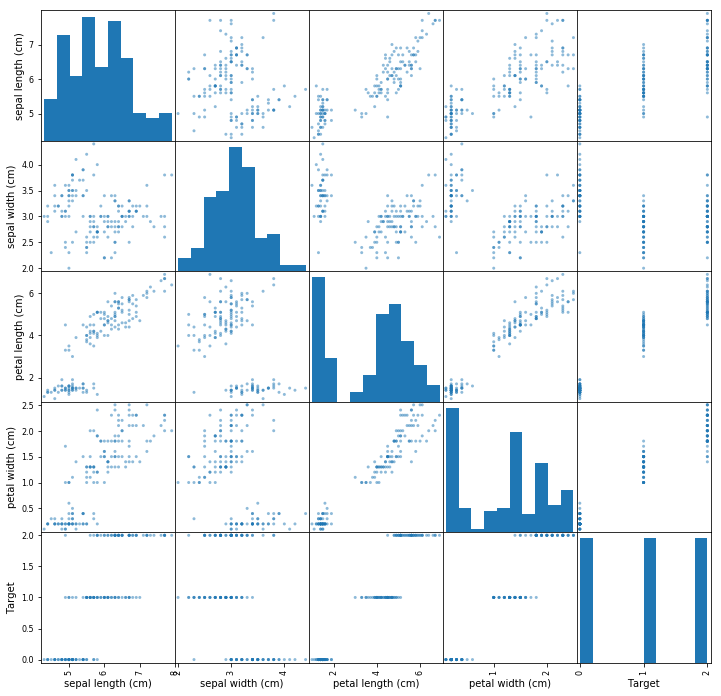

In [70]:
# Load Iris Data Set
iris = datasets.load_iris()

categories = list(iris.feature_names)
categories.append("Target")
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=categories)

print(iris_df.describe())
scatter_matrix(iris_df, figsize=(12, 12))

The following example shows a binary classification using the logistic function to determine if a particular flower is a virginica based upon solely its petal width.

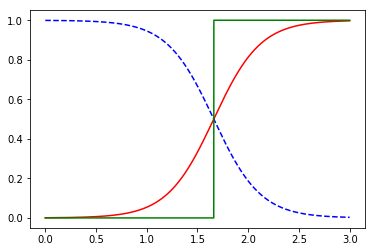

In [71]:
# Classify if virginica or not

# Prepare Data
X = iris["data"][:,3].reshape(-1,1) # formats the petal width column from the data set
y = (iris["target"] == 2).astype(np.int) # only virginica is true (1)

# build model
model = LogisticRegression(solver="lbfgs")
model.fit(X,y)

# Determine probability curves for for x from 0 to 3.
X_test = np.linspace(0,3,10000).reshape(-1,1)
y_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

# Plot probability curves and prediction curves.
plt.figure("Probabilities from logistic.")
plt.plot(X_test, y_proba[:,1], "r-")
plt.plot(X_test, y_proba[:,0], "b--")
plt.plot(X_test, y_pred, "g-")

Now observe the algorithm's performance via a confusion matrix from a 10-fold cross-validation test.

In [72]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X, y, cv=10)


print(confusion_matrix(y, y_pred))
print("Pecision Score = " + str(precision_score(y, y_pred)))
print("Recall Score = " + str(recall_score(y,y_pred)))
print("F1 Score = " + str(f1_score(y,y_pred)))

[[98  2]
 [ 4 46]]
Pecision Score = 0.9583333333333334
Recall Score = 0.92
F1 Score = 0.9387755102040817


Now, observe the multi-class classification across all flower types using the petal width and length as our inputs.

In [73]:
X = iris["data"][:,(2,3)]
y = iris["target"]

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
model.fit(X,y)

# Test the classifier
print(model.predict([[5,2],[1,3]]))
print(iris.target_names)

[2 0]
['setosa' 'versicolor' 'virginica']


Examine our classifier's confusion matrix.  It is performing quite well for our inputs.

In [74]:
y_pred = cross_val_predict(model, X, y, cv=10)


print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
